In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('seaborn-v0_8-dark')

# Analyzing Query Performance Data

In [7]:
# Load the data
query_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\Unbxd Query performance.csv")

In [8]:
# Basic info and statistics
print(query_df.info())
print(query_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          500 non-null    object 
 1   hits           500 non-null    int64  
 2   clicks         500 non-null    int64  
 3   clickThroughs  500 non-null    int64  
 4   ctr            500 non-null    float64
 5   carts          500 non-null    int64  
 6   orders         500 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB
None
              hits       clicks  clickThroughs        ctr       carts  \
count   500.000000   500.000000     500.000000  500.00000   500.00000   
mean     61.670000    99.620000      30.638000   56.63400    16.27600   
std     191.192464   143.261157      45.390523   19.59916    62.74962   
min      14.000000     0.000000       0.000000    0.00000     0.00000   
25%      19.000000    27.000000      10.000000   42.86000     2.000

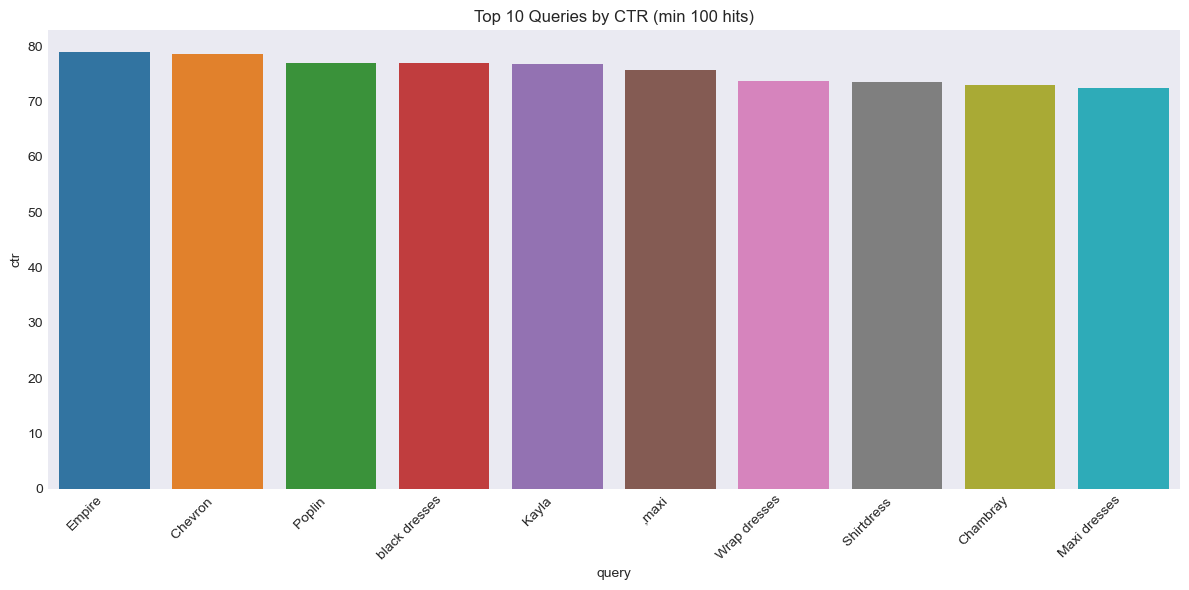

In [9]:
# Top 10 queries by CTR (with at least 100 hits)
top_ctr = query_df[query_df['hits'] >= 100].sort_values('ctr', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='query', y='ctr', data=top_ctr)
plt.title('Top 10 Queries by CTR (min 100 hits)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Ankita Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


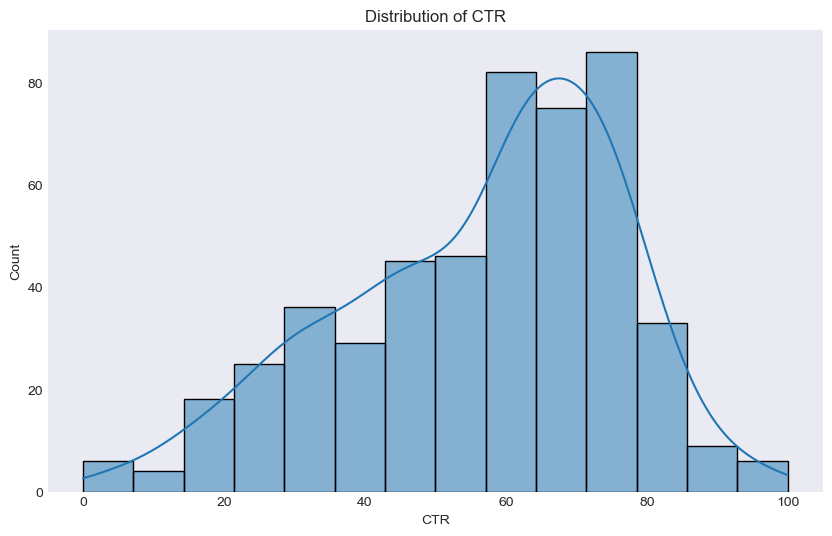

In [10]:
# Distribution of CTR
plt.figure(figsize=(10, 6))
sns.histplot(query_df['ctr'], kde=True)
plt.title('Distribution of CTR')
plt.xlabel('CTR')
plt.show()

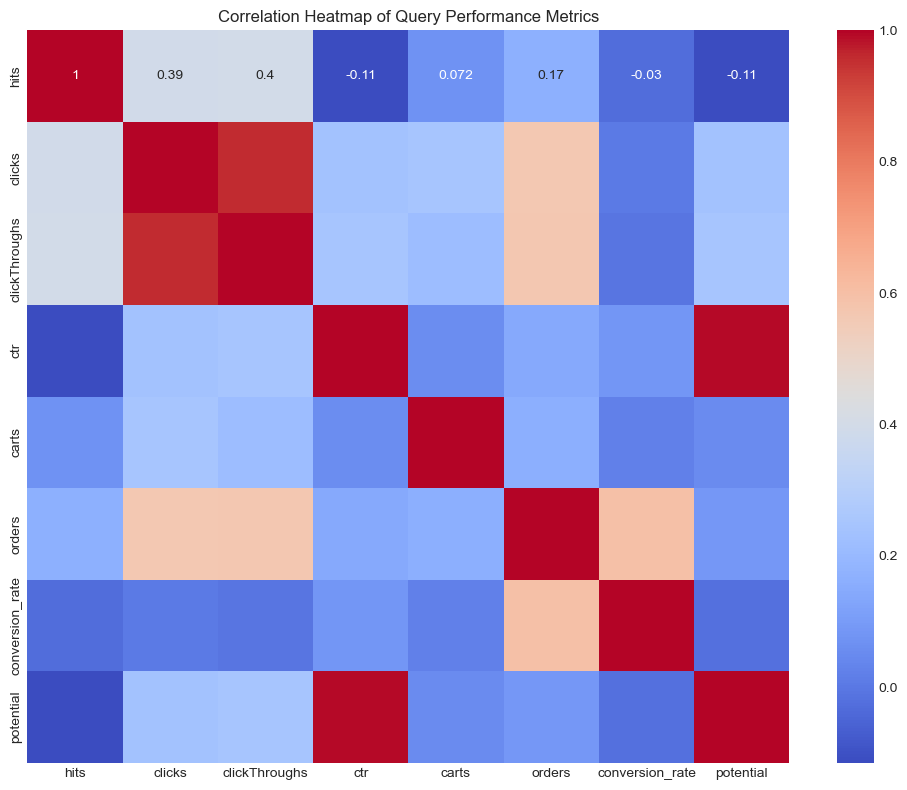

In [40]:
# Select only numeric columns
numeric_df = query_df.select_dtypes(include=[np.number])

# Correlation heatmap
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Query Performance Metrics')
plt.tight_layout()
plt.show()

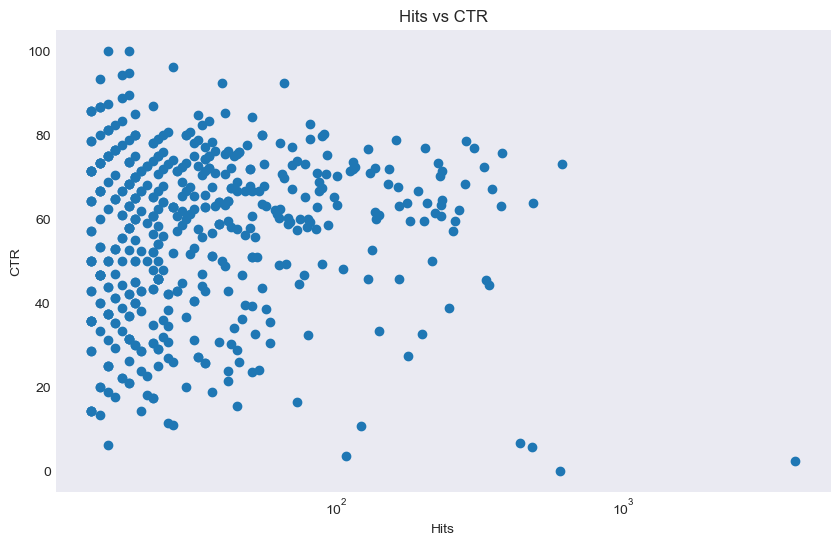

In [12]:
# Scatter plot of hits vs CTR
plt.figure(figsize=(10, 6))
plt.scatter(query_df['hits'], query_df['ctr'])
plt.title('Hits vs CTR')
plt.xlabel('Hits')
plt.ylabel('CTR')
plt.xscale('log')
plt.show()

# Product Performance Data

In [13]:
product_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\product performance.csv")

In [14]:
# Basic info and statistics
print(product_df.info())
print(product_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pId     2501 non-null   object
 1   pName   2501 non-null   object
 2   clicks  2501 non-null   int64 
 3   carts   2501 non-null   int64 
 4   orders  2501 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 97.8+ KB
None
             clicks        carts       orders
count   2501.000000  2501.000000  2501.000000
mean     544.756497    11.903239     3.166733
std     1349.562652    52.851750     8.410742
min        0.000000     0.000000     0.000000
25%       29.000000     0.000000     0.000000
50%       97.000000     0.000000     0.000000
75%      632.000000    12.000000     3.000000
max    29144.000000  2181.000000   204.000000


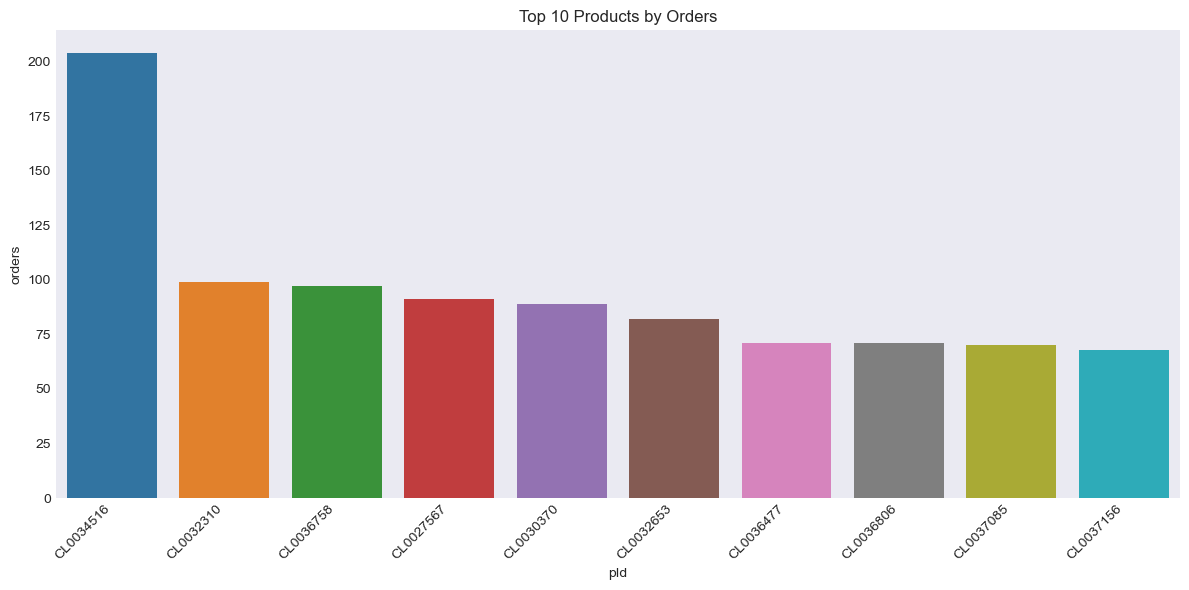

In [15]:
# Top 10 products by orders
top_orders = product_df.sort_values('orders', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='pId', y='orders', data=top_orders)
plt.title('Top 10 Products by Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Ankita Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


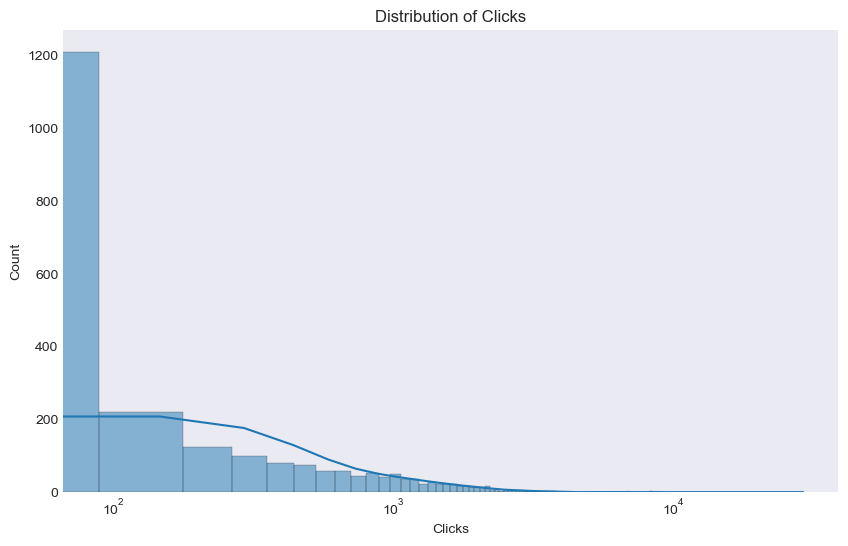

In [16]:

# Distribution of clicks
plt.figure(figsize=(10, 6))
sns.histplot(product_df['clicks'], kde=True)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.xscale('log')
plt.show()

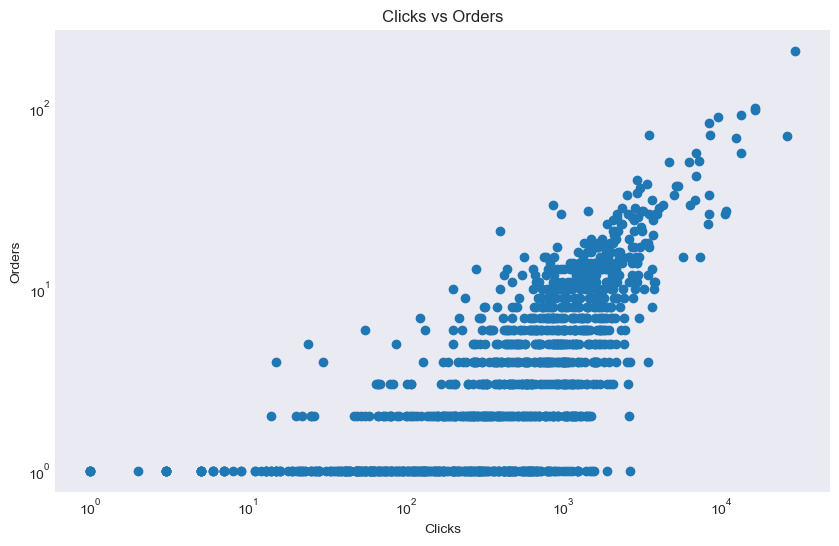

In [17]:
# Scatter plot of clicks vs orders
plt.figure(figsize=(10, 6))
plt.scatter(product_df['clicks'], product_df['orders'])
plt.title('Clicks vs Orders')
plt.xlabel('Clicks')
plt.ylabel('Orders')
plt.xscale('log')
plt.yscale('log')
plt.show()

 # Product Description Data

In [18]:
desc_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\product description.csv")

In [19]:
# Basic info and statistics
print(desc_df.info())
print(desc_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            716 non-null    object 
 1   Product Name   716 non-null    object 
 2   Category       716 non-null    object 
 3   Final Price    716 non-null    float64
 4   Initial Price  716 non-null    float64
 5   Color          716 non-null    object 
 6   Primary Color  716 non-null    object 
 7   Fabric         716 non-null    object 
dtypes: float64(2), object(6)
memory usage: 44.9+ KB
None
       Final Price  Initial Price
count   716.000000     716.000000
mean     87.556145      59.961173
std      65.990685      68.248824
min      39.950000      19.950000
25%      61.950000      39.700000
50%      79.950000      47.950000
75%      96.950000      59.950000
max     699.950000     699.950000


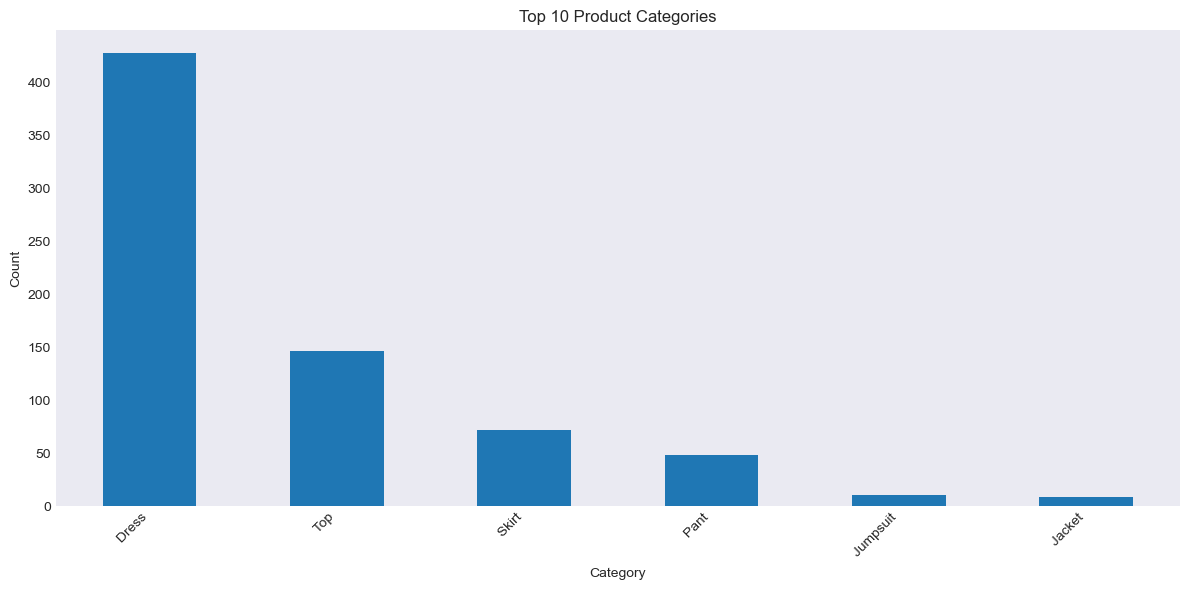

In [20]:
# Top 10 categories
category_counts = desc_df['Category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Ankita Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


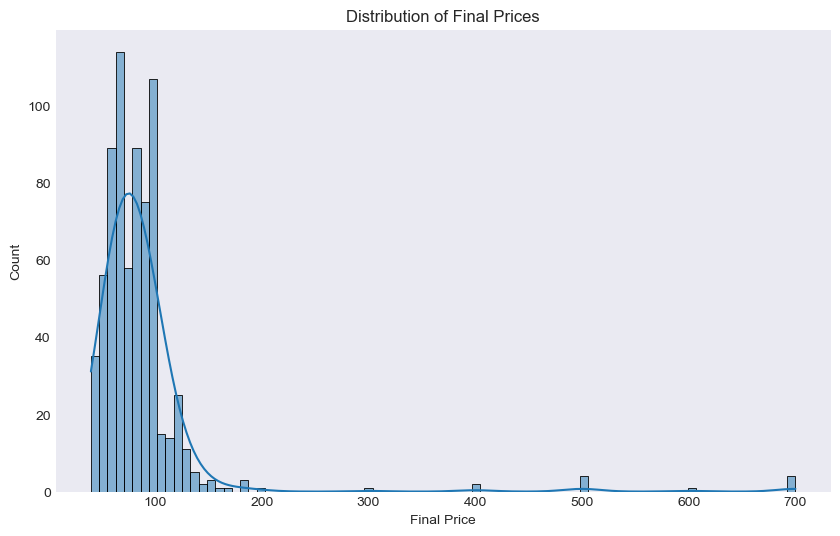

In [21]:
# Distribution of final prices
plt.figure(figsize=(10, 6))
sns.histplot(desc_df['Final Price'], kde=True)
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price')
plt.show()

#### Word cloud of product names (optional, requires additional library)

In [22]:
!pip install wordcloud

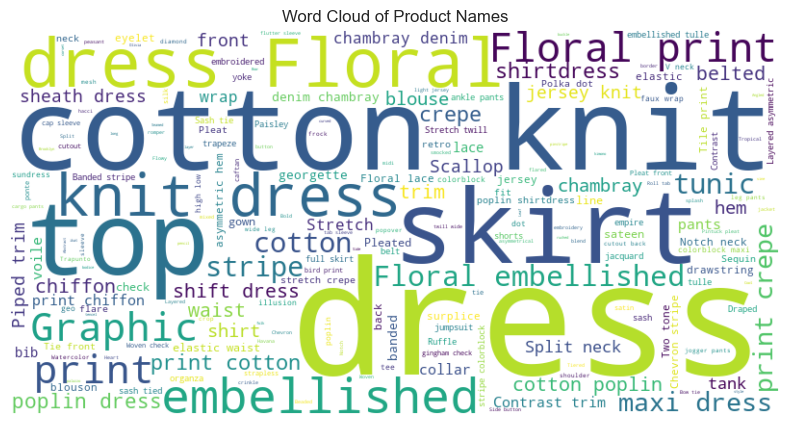

In [23]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(desc_df['Product Name']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Names')
plt.show()

In [24]:
combined_df = pd.merge(product_df, desc_df, left_on='pId', right_on='PID', how='inner')

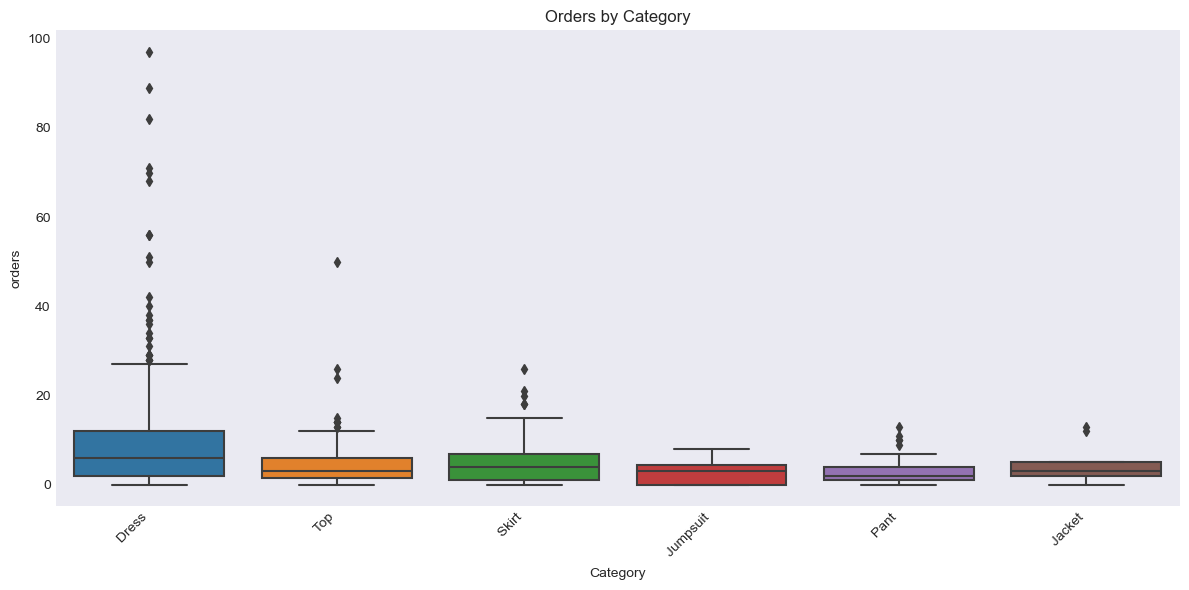

In [25]:
# Boxplot of orders by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='orders', data=combined_df)
plt.title('Orders by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

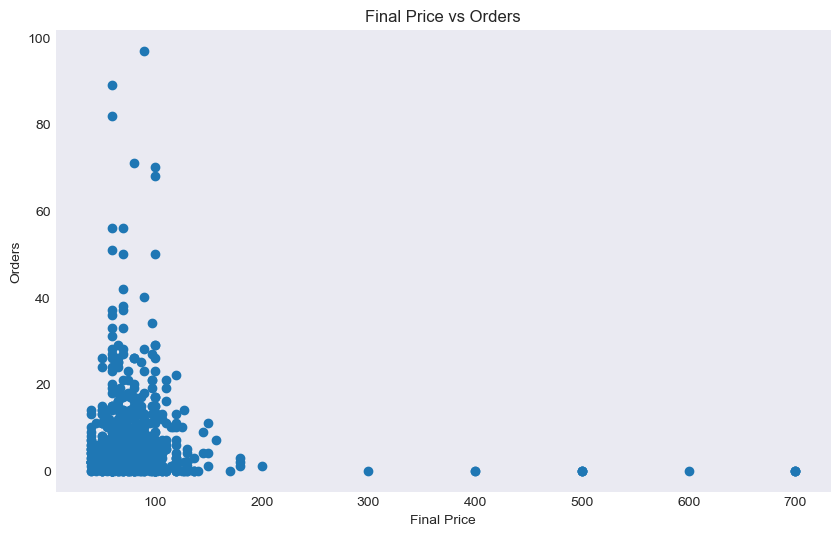

In [26]:
# Scatter plot of final price vs orders
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Final Price'], combined_df['orders'])
plt.title('Final Price vs Orders')
plt.xlabel('Final Price')
plt.ylabel('Orders')
plt.show()

ADvanced analysis 

In [28]:
# Calculate conversion rate (orders / hits)
query_df['conversion_rate'] = query_df['orders'] / query_df['hits']


In [29]:
# Identify high-potential queries (high CTR, low conversion)
query_df['potential'] = query_df['ctr'] * (1 - query_df['conversion_rate'])
high_potential = query_df.sort_values('potential', ascending=False).head(10)

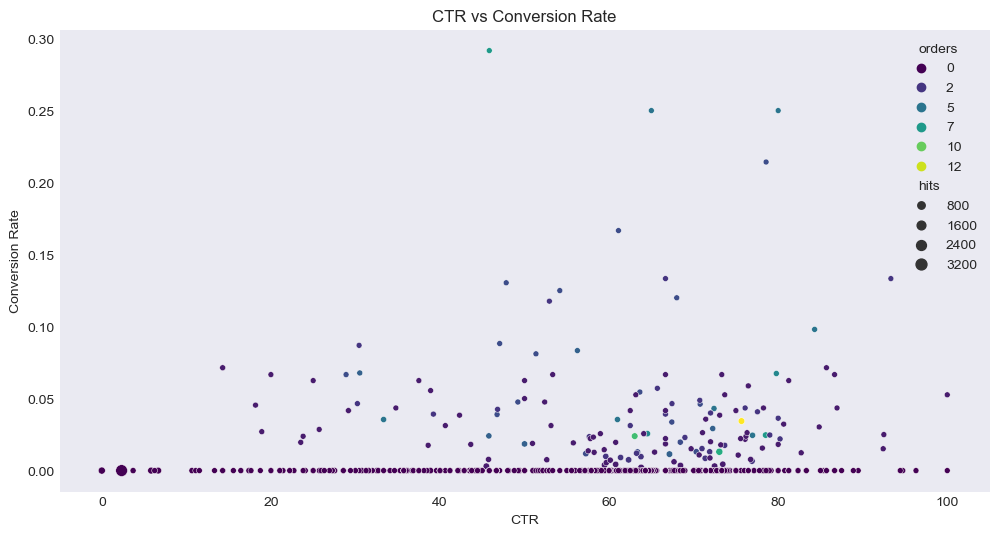

Top 10 High-Potential Queries:
                            query     ctr  conversion_rate   potential
424  "contrast trim poplin dress"  100.00         0.000000  100.000000
237                 retro dresses   96.30         0.000000   96.300000
350            Little Black Dress   94.74         0.000000   94.740000
357               VICTORIA DRESS   100.00         0.052632   94.736842
383                     Bohemian    94.44         0.000000   94.440000
93                   empire waist   92.42         0.015152   91.019697
163                       stretch   92.50         0.025000   90.187500
365                       Parrot    89.47         0.000000   89.470000
382                    black tops   88.89         0.000000   88.890000
438                       Citron    87.50         0.000000   87.500000


In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=query_df, x='ctr', y='conversion_rate', size='hits', hue='orders', palette='viridis')
plt.title('CTR vs Conversion Rate')
plt.xlabel('CTR')
plt.ylabel('Conversion Rate')
plt.show()

print("Top 10 High-Potential Queries:")
print(high_potential[['query', 'ctr', 'conversion_rate', 'potential']])

In [31]:
# 2. Product Performance Clustering

# Prepare data for clustering
X = product_df[['clicks', 'carts', 'orders']].values
X = StandardScaler().fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
product_df['cluster'] = kmeans.fit_predict(X)

C:\Users\Ankita Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


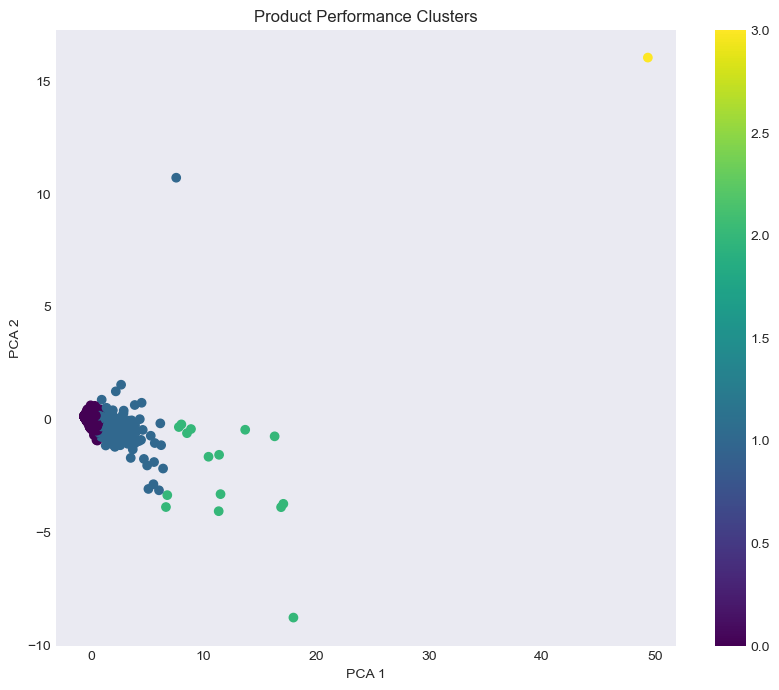

In [32]:
# Visualize clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=product_df['cluster'], cmap='viridis')
plt.title('Product Performance Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
plt.show()

In [33]:
print("\nProduct Cluster Characteristics:")
print(product_df.groupby('cluster')[['clicks', 'carts', 'orders']].mean())


Product Cluster Characteristics:
               clicks        carts      orders
cluster                                       
0          258.719545     4.542727    1.221364
1         2089.691228    48.859649   14.122807
2        11236.466667   244.666667   66.933333
3        29144.000000  2181.000000  204.000000


In [34]:
# 3. Price Elasticity Analysis

combined_df = pd.merge(product_df, desc_df, left_on='pId', right_on='PID', how='inner')


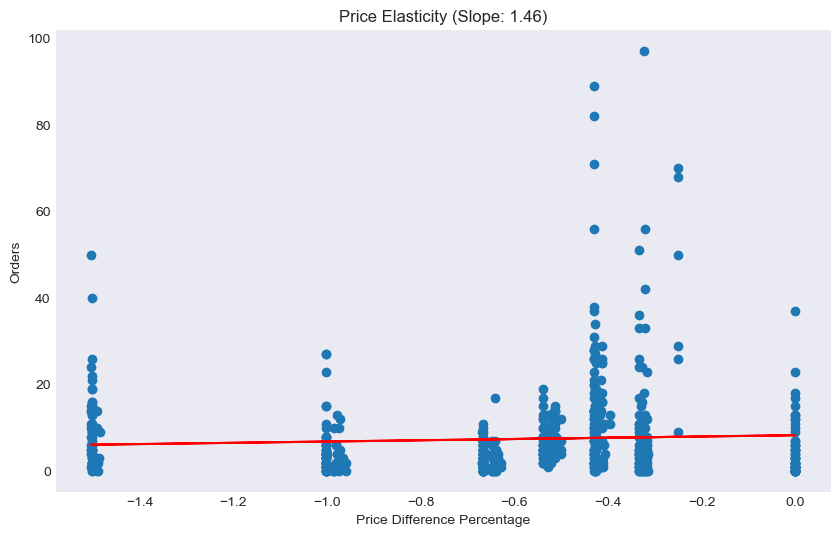


Price Elasticity: 1.46


In [35]:
# Calculate price elasticity
combined_df['price_diff'] = combined_df['Initial Price'] - combined_df['Final Price']
combined_df['price_diff_percentage'] = combined_df['price_diff'] / combined_df['Initial Price']

# Assuming orders are influenced by price differences
elasticity = stats.linregress(combined_df['price_diff_percentage'], combined_df['orders'])

plt.figure(figsize=(10, 6))
plt.scatter(combined_df['price_diff_percentage'], combined_df['orders'])
plt.plot(combined_df['price_diff_percentage'], elasticity.intercept + elasticity.slope * combined_df['price_diff_percentage'], 'r')
plt.title(f'Price Elasticity (Slope: {elasticity.slope:.2f})')
plt.xlabel('Price Difference Percentage')
plt.ylabel('Orders')
plt.show()

print(f"\nPrice Elasticity: {elasticity.slope:.2f}")

In [36]:
# 4. Seasonal Trend Analysis (assuming 'query' contains some seasonal terms)

# Define seasons (this is a simplified approach)
winter_terms = ['winter', 'cold', 'snow', 'holiday']
summer_terms = ['summer', 'beach', 'sun', 'vacation']

query_df['is_winter'] = query_df['query'].str.contains('|'.join(winter_terms), case=False)
query_df['is_summer'] = query_df['query'].str.contains('|'.join(summer_terms), case=False)

seasonal_performance = query_df.groupby(['is_winter', 'is_summer'])[['ctr', 'conversion_rate']].mean()

print("\nSeasonal Query Performance:")
print(seasonal_performance)


Seasonal Query Performance:
                           ctr  conversion_rate
is_winter is_summer                            
False     False      56.641004         0.013009
          True       54.890000         0.021739


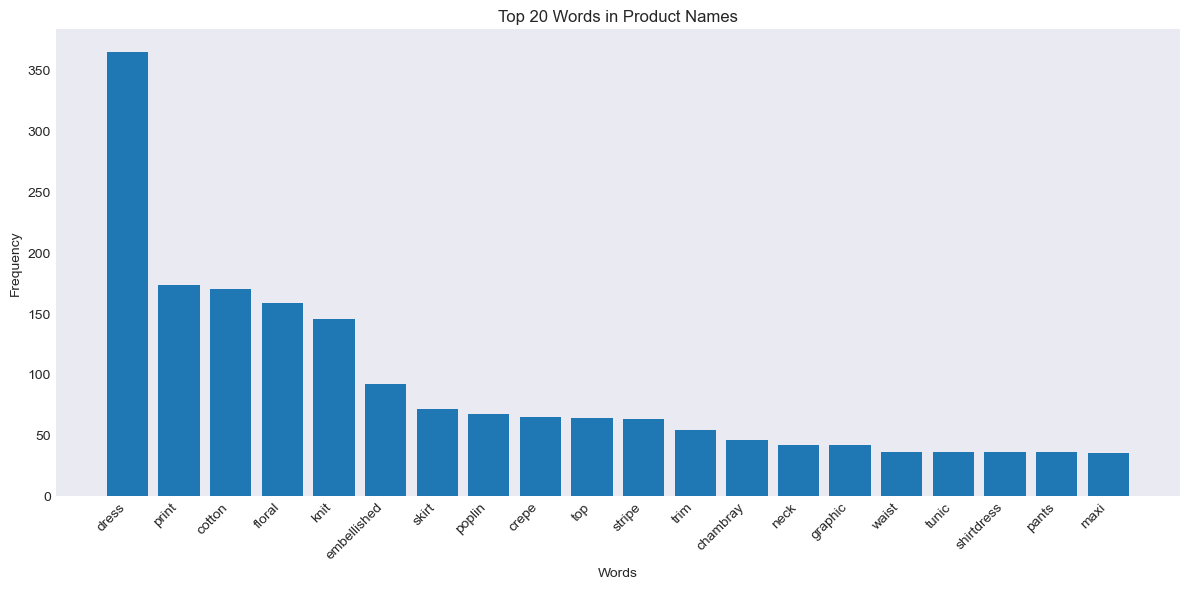


Top 20 Words in Product Names:
{'dress': 365, 'print': 173, 'cotton': 170, 'floral': 158, 'knit': 145, 'embellished': 92, 'skirt': 71, 'poplin': 67, 'crepe': 65, 'top': 64, 'stripe': 63, 'trim': 54, 'chambray': 46, 'neck': 42, 'graphic': 42, 'waist': 36, 'tunic': 36, 'shirtdress': 36, 'pants': 36, 'maxi': 35}


In [37]:
# 5. Word Frequency Analysis in Product Names

from collections import Counter
import re

# Tokenize and count words in product names
words = ' '.join(desc_df['Product Name']).lower()
word_count = Counter(re.findall(r'\w+', words))

# Plot top 20 most common words
top_words = dict(word_count.most_common(20))
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Words in Product Names')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 20 Words in Product Names:")
print(top_words)


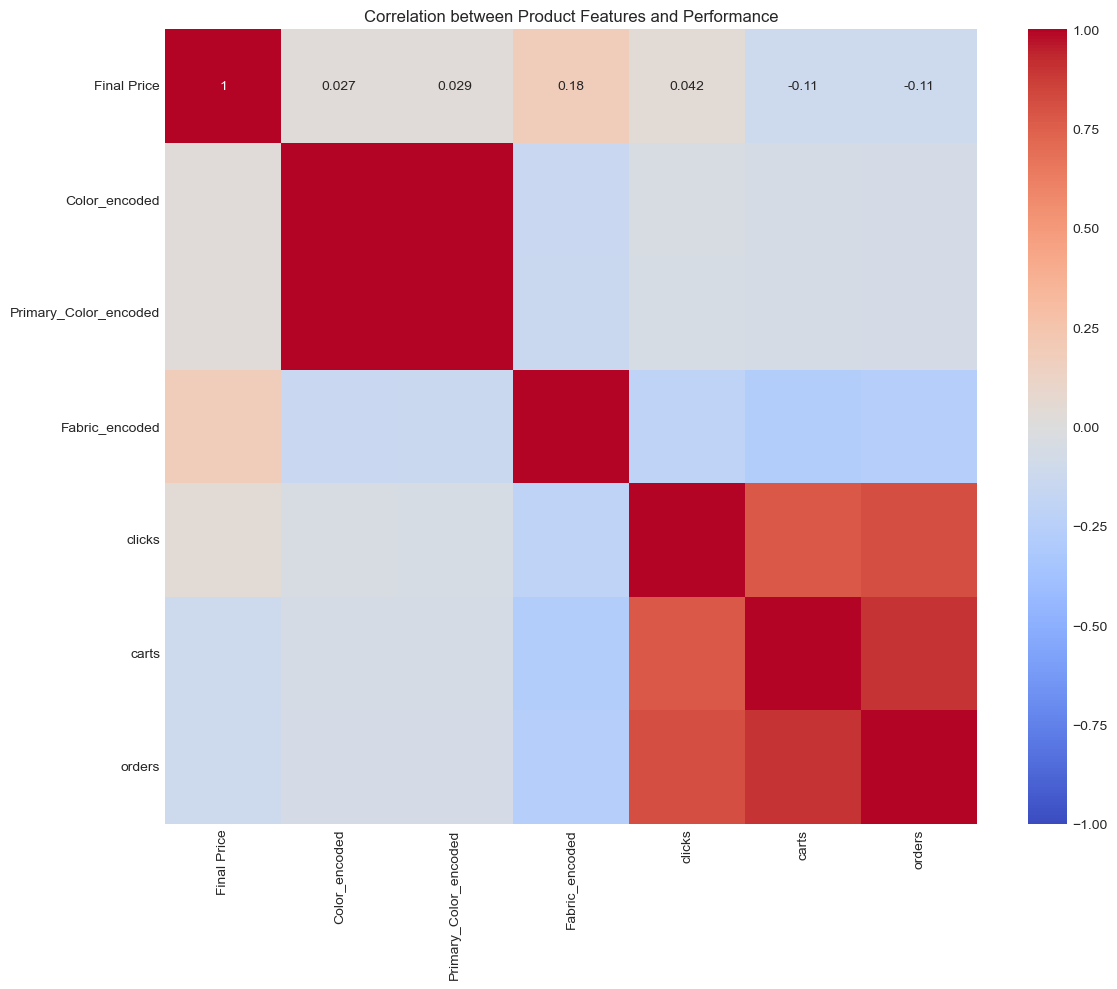


Analysis completed. Please review the generated visualizations and insights.


In [39]:
# 6. Correlation between Product Features and Performance

# Encode categorical features
combined_df['Color_encoded'] = pd.Categorical(combined_df['Color']).codes
combined_df['Primary_Color_encoded'] = pd.Categorical(combined_df['Primary Color']).codes
combined_df['Fabric_encoded'] = pd.Categorical(combined_df['Fabric']).codes

feature_cols = ['Final Price', 'Color_encoded', 'Primary_Color_encoded', 'Fabric_encoded']
performance_cols = ['clicks', 'carts', 'orders']

correlation_matrix = combined_df[feature_cols + performance_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Product Features and Performance')
plt.tight_layout()
plt.show()

print("\nAnalysis completed. Please review the generated visualizations and insights.")


In [41]:
# Load the datasets
query_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\Unbxd Query performance.csv")
product_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\product performance.csv")
desc_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\product description.csv")

In [42]:
# Merge product performance with product description
product_full_df = pd.merge(product_df, desc_df, left_on='pId', right_on='PID', how='inner')

# Calculate conversion rate for queries
query_df['conversion_rate'] = query_df['orders'] / query_df['hits']

# Calculate conversion rate for products
product_full_df['conversion_rate'] = product_full_df['orders'] / product_full_df['clicks']

## Query Performance Analysis

In [44]:
# Identify top performing queries
top_queries = query_df.sort_values('conversion_rate', ascending=False).head(10)

# Identify underperforming queries (high volume, low conversion)
underperforming_queries = query_df[query_df['hits'] > 100].sort_values('conversion_rate').head(10)

print("Top performing queries:")
print(top_queries[['query', 'hits', 'conversion_rate']])

print("\nUnderperforming queries:")
print(underperforming_queries[['query', 'hits', 'conversion_rate']])

Top performing queries:
                                                 query  hits  conversion_rate
265                   Sash waist chambray dress-Indigo    24         0.291667
340  Chevron stripe colorblock dress-Spring green/b...    20         0.250000
334                                           Grecian     20         0.250000
485                        \tCitron floral print dress    14         0.214286
392                                          clearance    18         0.166667
449                                        Curve waist    15         0.133333
465                    Cotton poplin A-line shirtdress    15         0.133333
292                                     plus size tops    23         0.130435
277                                         CL0032653     24         0.125000
258                             fit and flare dresses     25         0.120000

Underperforming queries:
                 query  hits  conversion_rate
0                pink   3971              0.0


# Product Performance Analysis

In [45]:
# Identify top selling products
top_products = product_full_df.sort_values('orders', ascending=False).head(10)

# Identify products with high clicks but low orders
high_click_low_order = product_full_df[product_full_df['clicks'] > 1000].sort_values('conversion_rate').head(10)

print("Top selling products:")
print(top_products[['Product Name', 'clicks', 'orders', 'conversion_rate']])

print("\nProducts with high clicks but low orders:")
print(high_click_low_order[['Product Name', 'clicks', 'orders', 'conversion_rate']])

Top selling products:
                                Product Name  clicks  orders  conversion_rate
1    Seagull print pleated cotton knit dress   16343      97         0.005935
5              Pleat waist poplin shirtdress    9571      89         0.009299
8            Cotton poplin A-line shirtdress    8287      82         0.009895
6                  Retro chambray shirtdress    8407      71         0.008445
0       Chevron stripe colorblock maxi dress   25892      70         0.002704
3       Chevron stripe colorblock maxi dress   12364      68         0.005500
2      Pleat front chambray denim maxi dress   13317      56         0.004205
12               Feminine pleated knit dress    6882      56         0.008137
11                     Tie neck poplin dress    7175      51         0.007108
15      Chevron stripe colorblock maxi dress    6229      50         0.008027

Products with high clicks but low orders:
                              Product Name  clicks  orders  conversion_rate
2

In [46]:
# Category Analysis

In [47]:
# Calculate average conversion rate by category
category_performance = product_full_df.groupby('Category')['conversion_rate'].mean().sort_values(ascending=False)

print("Category performance:")
print(category_performance)

Category performance:
Category
 Top         0.011403
 Skirt       0.008062
 Jumpsuit    0.006191
 Jacket      0.005959
 Dress       0.005938
 Pant        0.005791
Name: conversion_rate, dtype: float64


# Price Analysis

In [48]:
# Calculate price difference and discount percentage
product_full_df['price_diff'] = product_full_df['Initial Price'] - product_full_df['Final Price']
product_full_df['discount_percentage'] = product_full_df['price_diff'] / product_full_df['Initial Price'] * 100

# Analyze correlation between discount and conversion rate
discount_correlation = product_full_df['discount_percentage'].corr(product_full_df['conversion_rate'])

print("Correlation between discount percentage and conversion rate:", discount_correlation)

Correlation between discount percentage and conversion rate: -0.06497387900584677


# Query-Product Matching Analysis

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform product names
product_vectors = vectorizer.fit_transform(product_full_df['Product Name'])

# Transform queries
query_vectors = vectorizer.transform(query_df['query'])

# Calculate similarity between queries and product names
similarities = cosine_similarity(query_vectors, product_vectors)

# Get the best matching product for each query
best_matches = similarities.argmax(axis=1)

# Add best matching product to query dataframe
query_df['best_match_product'] = product_full_df['Product Name'].iloc[best_matches].values
query_df['match_similarity'] = similarities.max(axis=1)

# Analyze queries with low similarity scores
low_similarity_queries = query_df.sort_values('match_similarity').head(10)

print("Queries with low similarity to products:")
print(low_similarity_queries[['query', 'best_match_product', 'match_similarity']])


Queries with low similarity to products:
          query                     best_match_product  match_similarity
249  CL0034516    Chevron stripe colorblock maxi dress               0.0
132      Shrugs   Chevron stripe colorblock maxi dress               0.0
380     joggers   Chevron stripe colorblock maxi dress               0.0
379       suits   Chevron stripe colorblock maxi dress               0.0
375      formal   Chevron stripe colorblock maxi dress               0.0
374        work   Chevron stripe colorblock maxi dress               0.0
372       Aqua    Chevron stripe colorblock maxi dress               0.0
140        dots   Chevron stripe colorblock maxi dress               0.0
141   Navy blue   Chevron stripe colorblock maxi dress               0.0
369     Jasmine   Chevron stripe colorblock maxi dress               0.0


In [54]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\product performance.csv")

# Sort by orders (primary), carts (secondary), and clicks (tertiary)
df_sorted = df.sort_values(['orders', 'carts', 'clicks'], ascending=[False, False, False])

# Function to display top and bottom performing products
def display_products(df, n, top=True):
    if top:
        products = df.head(n)
        performance = "Top"
    else:
        products = df.tail(n)
        performance = "Bottom"
    
    print(f"\n{performance} {n} Performing Products:")
    print(products[['pId', 'pName', 'clicks', 'carts', 'orders']])

# Display top 10 performing products
display_products(df_sorted,20)

# Display bottom 10 performing products
display_products(df_sorted, 20, top=False)

# Optional: Save results to CSV
df_sorted.to_csv('product_performance_sorted.csv', index=False)


Top 20 Performing Products:
          pId                                   pName  clicks  carts  orders
0   CL0034516    Chevron stripe colorblock maxi dress   29144   2181     204
3   CL0032310         Cotton knit fit and flare dress   16234    350      99
2   CL0036758    Bird print pleated cotton knit dress   16343    340      97
5   CL0027567       Elastic waist chambray maxi dress   13234    452      91
9   CL0030370           Pleat waist poplin shirtdress    9571    367      89
12  CL0032653         Cotton poplin A-line shirtdress    8287    247      82
10  CL0036806               Retro chambray shirtdress    8407    227      71
41  CL0036477      Seersucker stripe notch neck dress    3478    178      71
1   CL0037085    Chevron stripe colorblock maxi dress   25892    237      70
6   CL0037156    Chevron stripe colorblock maxi dress   12364    172      68
17  CL0030567             Feminine pleated knit dress    6882    242      56
4   CL0037110   Pleat front chambray denim maxi

In [57]:
import pandas as pd
import numpy as np

# Load the Unbxd Query performance data
query_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\Unbxd Query performance.csv")

# Function to display top performing queries
def display_top_queries(df, column, n=10):
    top_queries = df.sort_values(column, ascending=False).head(n)
    print(f"\nTop {n} Queries by {column}:")
    print(top_queries[['query', 'hits', 'clicks', 'clickThroughs', 'ctr', 'carts', 'orders']])

# Display top queries for different metrics
display_top_queries(query_df, 'hits', 20)
display_top_queries(query_df, 'clicks', 20)
display_top_queries(query_df, 'carts', 20)
display_top_queries(query_df, 'orders', 20)




Top 20 Queries by hits:
                         query  hits  clicks  clickThroughs    ctr  carts  \
0                        pink   3971     330             93   2.34     18   
1                     Chambray   612    1360            447  73.04    145   
2   gingham in green and white   601       0              0   0.00      0   
3                white dresses   486     800            310  63.79     73   
4                         grey   480      89             28   5.83     10   
5                   grey dress   435      65             29   6.67      7   
6                        ,maxi   378     888            286  75.66    117   
7                       green    376     723            237  63.03     64   
8                        birds   350     626            235  67.14     78   
9                       Purple   340     416            151  44.41     29   
10                        Reds   332     621            151  45.48     68   
11                Maxi dresses   327     633       

In [3]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the data in CSV files named 'query_performance.csv' and 'product_performance.csv'
query_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\Unbxd Query performance.csv")
product_df = pd.read_csv(r"C:\Users\Ankita Singh\networth corp\product performance.csv")

In [4]:
def create_funnel_chart(data, title):
    stages = list(data.index)
    values = list(data.values)

    fig = go.Figure(go.Funnel(
        y = stages,
        x = values,
        textinfo = "value+percent initial",
        textposition = "inside",
        textfont = dict(size=14),
        marker = {"color": ["royalblue", "cornflowerblue", "lightblue", "skyblue", "powderblue"]},
        connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}
    ))

    fig.update_layout(
        title_text = title,
        font = dict(size=14),
        width = 800,
        height = 600
    )

    return fig

# Function to prepare data for funnel chart
def prepare_funnel_data(df, columns):
    return df[columns].mean().sort_values(ascending=False)

In [6]:
print(product_df.columns)


Index(['pId', 'pName', 'clicks', 'carts', 'orders'], dtype='object')


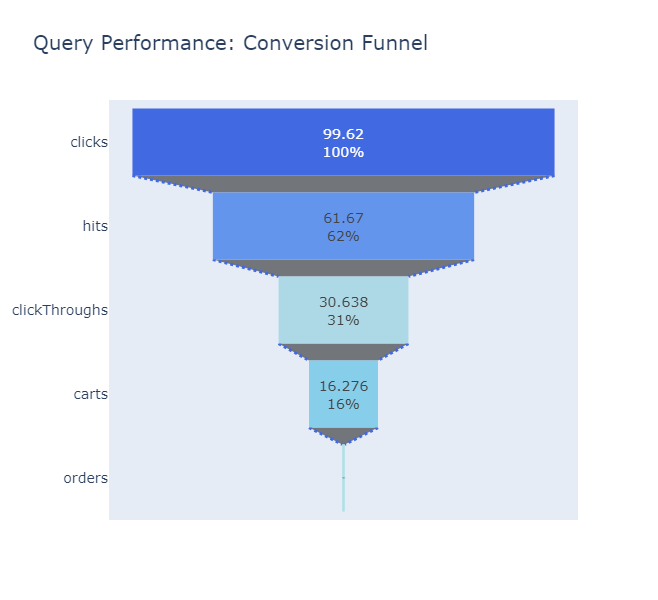

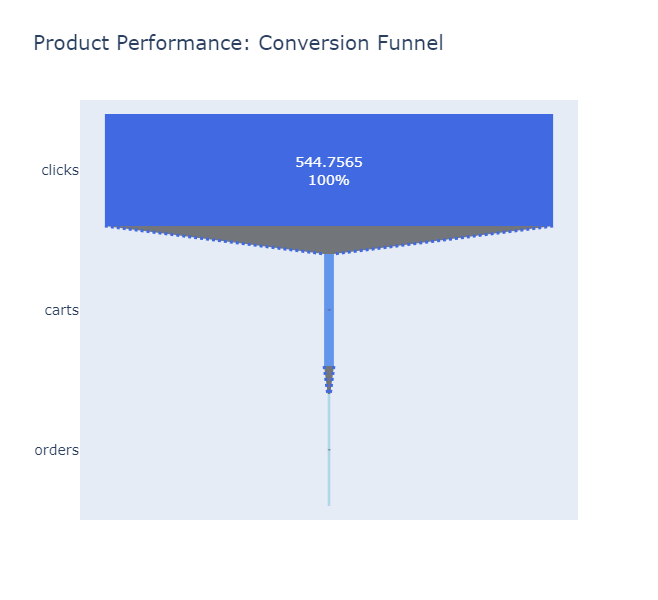

In [9]:
# Product Performance Funnel (without 'views')
product_funnel_data = prepare_funnel_data(product_df, ['clicks', 'carts', 'orders'])
product_funnel_chart = create_funnel_chart(product_funnel_data, "Product Performance: Conversion Funnel")

# Product Performance Funnel
product_funnel_data = prepare_funnel_data(product_df, [ 'clicks', 'carts', 'orders'])
product_funnel_chart = create_funnel_chart(product_funnel_data, "Product Performance: Conversion Funnel")

# Display the charts
query_funnel_chart.show()
product_funnel_chart.show()

# Optionally, save the charts as HTML files
query_funnel_chart.write_html("query_conversion_funnel.html")
product_funnel_chart.write_html("product_conversion_funnel.html")